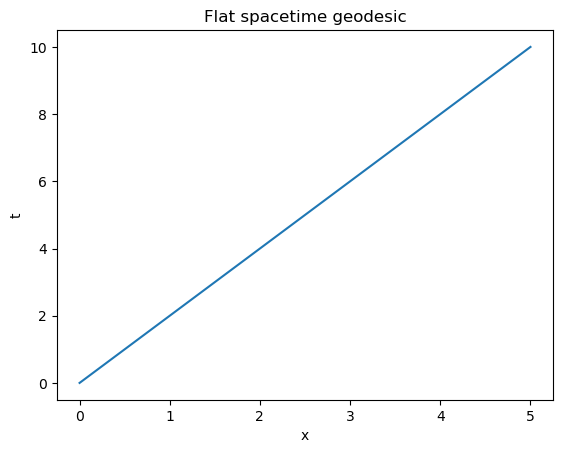

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Flat spacetime: x^μ = (t, x)
def geodesic_eq(lmbda, Y):
    # Y = (t, x, vt, vx)
    t, x, vt, vx = Y
    return [vt, vx, 0.0, 0.0]

# Initial conditions
Y0 = [0.0, 0.0, 1.0, 0.5]

sol = solve_ivp(
    geodesic_eq,
    (0, 10),
    Y0,
    t_eval=np.linspace(0, 10, 200)
)

plt.plot(sol.y[1], sol.y[0])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Flat spacetime geodesic")
plt.show()


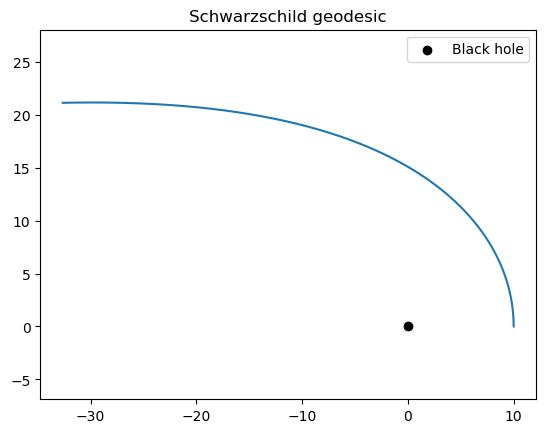

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

M = 1.0  # mass

def christoffel(r):
    Γ = np.zeros((3,3,3))

    Γ[0,0,1] = Γ[0,1,0] = M/(r*(r-2*M))
    Γ[1,0,0] = M*(r-2*M)/r**3
    Γ[1,1,1] = -M/(r*(r-2*M))
    Γ[1,2,2] = -(r-2*M)
    Γ[2,1,2] = Γ[2,2,1] = 1/r

    return Γ

def geodesic_eq(lmbda, Y):
    x = Y[:3]     # (t, r, φ)
    v = Y[3:]     # derivatives

    t, r, phi = x
    Γ = christoffel(r)

    dxdl = v
    dvdl = np.zeros(3)

    for mu in range(3):
        for a in range(3):
            for b in range(3):
                dvdl[mu] -= Γ[mu,a,b] * v[a] * v[b]

    return np.concatenate((dxdl, dvdl))

# Initial conditions
t0 = 0.0
r0 = 10.0
phi0 = 0.0

vt0 = 1.0
vr0 = 0.0
vphi0 = 0.04

Y0 = [t0, r0, phi0, vt0, vr0, vphi0]

sol = solve_ivp(
    geodesic_eq,
    (0, 200),
    Y0,
    max_step=0.1
)

r = sol.y[1]
phi = sol.y[2]

# Convert to Cartesian for plotting
x = r * np.cos(phi)
y = r * np.sin(phi)

plt.plot(x, y)
plt.scatter(0, 0, color='black', label='Black hole')
plt.axis('equal')
plt.legend()
plt.title("Schwarzschild geodesic")
plt.show()


Black hole mass M (>0):  4
Initial radius r0 (> 2M):  9
Initial angle phi0 (radians):  3
Initial radial velocity dr/dλ:  2
Initial angular velocity dphi/dλ:  4


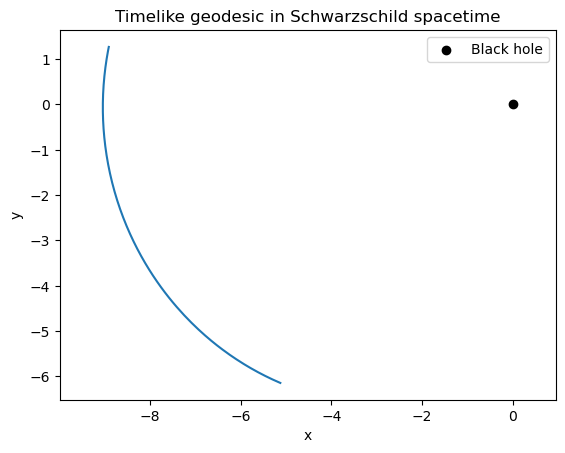

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sys

# -----------------------------
# User input: spacetime geometry
# -----------------------------
M = float(input("Black hole mass M (>0): "))
if M <= 0:
    print("Error: M must be positive.")
    sys.exit()

# -----------------------------
# User input: initial position
# -----------------------------
r0 = float(input("Initial radius r0 (> 2M): "))
phi0 = float(input("Initial angle phi0 (radians): "))

if r0 <= 2*M:
    print("Error: r0 must be greater than 2M (outside horizon).")
    sys.exit()

# -----------------------------
# User input: initial spatial velocities
# -----------------------------
vr0 = float(input("Initial radial velocity dr/dλ: "))
vphi0 = float(input("Initial angular velocity dphi/dλ: "))

# -----------------------------
# Compute dt/dλ from normalization
# -----------------------------
f = 1 - 2*M/r0

radicand = 1 + vr0**2 / f + r0**2 * vphi0**2
if radicand < 0:
    print("Error: normalization condition violated (timelike condition fails).")
    sys.exit()

vt0 = np.sqrt(radicand / f)   # future-directed

# Initial state vector
Y0 = [0.0, r0, phi0, vt0, vr0, vphi0]

# -----------------------------
# Christoffel symbols
# -----------------------------
def christoffel(r):
    Γ = np.zeros((3,3,3))

    Γ[0,0,1] = Γ[0,1,0] = M/(r*(r-2*M))
    Γ[1,0,0] = M*(r-2*M)/r**3
    Γ[1,1,1] = -M/(r*(r-2*M))
    Γ[1,2,2] = -(r-2*M)
    Γ[2,1,2] = Γ[2,2,1] = 1/r

    return Γ

# -----------------------------
# Geodesic equations
# -----------------------------
def geodesic_eq(lmbda, Y):
    x = Y[:3]     # (t, r, phi)
    v = Y[3:]     # (dt/dλ, dr/dλ, dphi/dλ)

    t, r, phi = x
    Γ = christoffel(r)

    dxdl = v
    dvdl = np.zeros(3)

    for mu in range(3):
        for a in range(3):
            for b in range(3):
                dvdl[mu] -= Γ[mu, a, b] * v[a] * v[b]

    return np.concatenate((dxdl, dvdl))

# -----------------------------
# Solve geodesic equation
# -----------------------------
sol = solve_ivp(
    geodesic_eq,
    (0, 200),
    Y0,
    max_step=0.1,
    rtol=1e-9,
    atol=1e-9
)

# -----------------------------
# Plot spatial trajectory
# -----------------------------
r = sol.y[1]
phi = sol.y[2]

x = r * np.cos(phi)
y = r * np.sin(phi)

plt.figure()
plt.plot(x, y)
plt.scatter(0, 0, color='black', label='Black hole')
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Timelike geodesic in Schwarzschild spacetime")
plt.show()


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, VBox
import warnings
warnings.filterwarnings("ignore")  # optional: suppress solver warnings

# -----------------------------
# Christoffel symbols
# -----------------------------
def christoffel(r, M):
    Γ = np.zeros((3,3,3))
    Γ[0,0,1] = Γ[0,1,0] = M/(r*(r-2*M))
    Γ[1,0,0] = M*(r-2*M)/r**3
    Γ[1,1,1] = -M/(r*(r-2*M))
    Γ[1,2,2] = -(r-2*M)
    Γ[2,1,2] = Γ[2,2,1] = 1/r
    return Γ

# -----------------------------
# Geodesic equations
# -----------------------------
def geodesic_eq(lmbda, Y, M):
    x = Y[:3]
    v = Y[3:]
    t, r, phi = x
    Γ = christoffel(r, M)
    dxdl = v
    dvdl = np.zeros(3)
    for mu in range(3):
        for a in range(3):
            for b in range(3):
                dvdl[mu] -= Γ[mu,a,b] * v[a] * v[b]
    return np.concatenate((dxdl, dvdl))

# -----------------------------
# Function to update plot
# -----------------------------
def plot_geodesic(M, r0, phi0, vr0, vphi0):
    if M <= 0 or r0 <= 2*M:
        return
    
    f = 1 - 2*M/r0
    radicand = 1 + vr0**2 / f + r0**2 * vphi0**2
    if radicand < 0:
        return
    
    vt0 = np.sqrt(radicand / f)
    Y0 = [0.0, r0, phi0, vt0, vr0, vphi0]
    
    sol = solve_ivp(
        lambda lmbda, Y: geodesic_eq(lmbda, Y, M),
        (0, 200),
        Y0,
        max_step=0.1,
        rtol=1e-8,
        atol=1e-8
    )
    
    r = sol.y[1]
    phi = sol.y[2]
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    
    plt.figure(figsize=(6,6))
    plt.plot(x, y)
    plt.scatter(0, 0, color='black', label='Black hole')
    plt.axis('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Timelike geodesic in Schwarzschild spacetime")
    plt.show()

# -----------------------------
# Sliders
# -----------------------------
interactive_plot = interactive(
    plot_geodesic,
    M=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description="M"),
    r0=FloatSlider(value=10.0, min=2.01, max=50.0, step=0.1, description="r0"),
    phi0=FloatSlider(value=0.0, min=0.0, max=2*np.pi, step=0.01, description="phi0"),
    vr0=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.01, description="dr/dλ"),
    vphi0=FloatSlider(value=0.04, min=-1.0, max=1.0, step=0.01, description="dphi/dλ")
)

VBox([interactive_plot])
